<a href="https://colab.research.google.com/github/MethilaRaya/Brain-Tumour-Detection/blob/main/Brain_Tumour_Detection_YOLOv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Cloning and Building Darknet


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

# Step 2: Download pre-trained YOLOv4 weights


In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# Step 3: Define Helper Functions (To show image after running detection, upload and download image to and from Cloud VM)


In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

# Step 4: Upload Local Files or Google Drive Files for training


### Method 1: Local Files
To upload local files just use our helper function by running 'upload()' as seen below. Click **Choose Files** and select the image from your local machine that you want to upload to the cloud VM.

If this function doesn't work for you then click the **Upload** button in the File Explorer on the left side of your notebook.
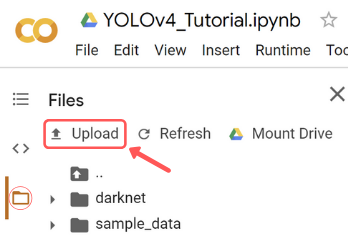

The image should save to the root directory of the cloud VM so that you can access it from the darknet command by running.
```
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights ../<your image name>
```

In [ ]:
# try out the upload helper function! (I uploaded an image called highway.jpg, upload whatever you want!)
%cd ..
upload()
%cd darknet

In [ ]:
# run darknet with YOLOv4 on your personal image! (note yours will not be called highway.jpg so change the name)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights ../highway.jpg
imShow('predictions.jpg')

### Method 2: Google Drive


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
# cd back into the darknet folder to run detections
%cd darknet

# Step 5: Move Custom Datasets Into Cloud VM


In [ ]:
# this is where my datasets are stored within my Google Drive (I created a yolov4 folder to store all important files for custom training)
!ls /mydrive/yolov4

In [ ]:
!pwd

In [ ]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/Datasets/train.zip -d /content/darknet/data
!unzip /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/Datasets/valid.zip -d /content/darknet/data
!unzip /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/Datasets/test.zip -d /content/darknet/data

In [ ]:
%cd /content/darknet/data/train
!ls -1 | wc -l

In [ ]:
%cd /content/darknet/data/valid
!ls -1 | wc -l

In [ ]:
%cd /content/darknet/data/test
!ls -1 | wc -l

In [ ]:
%cd /content/darknet

# Step 6: Configure Files for Training


## i) Cfg File


In [ ]:
# download cfg to google drive and edit it based on your dataset which is mentioned in https://github.com/AlexeyAB
!cp cfg/yolov4-custom.cfg /mydrive/yolov4/yolov4-obj.cfg

In [ ]:
# to download to local machine (change its name to yolov4-obj.cfg once you download)
download('cfg/yolov4-custom.cfg')

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive. Follow the instruction in https://github.com/AlexeyAB
!cp /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings/obj.data /content/darknet/data
!cp /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings/obj.names /content/darknet/data

## iii) Generating train.txt and test.txt
The scripts can be accessed from the [Github Repo](https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial)

In [ ]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings/generate_train.py /content/darknet
!cp /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings/generate_validation.py /content/darknet
!cp /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings/generate_benchmark.py /content/darknet

In [ ]:
!cp /content/darknet/cfg/yolov4-obj.cfg /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings
!cp /content/darknet/generate_benchmark.py /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings
!cp /content/darknet/generate_train.py /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings
!cp /content/darknet/generate_validation.py /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings

Now run the cell for generating the txt files.

In [ ]:
!python generate_train.py
!python generate_validation.py
!python generate_benchmark.py

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

In [ ]:
!cp /content/darknet/data/obj.data /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings
!cp /content/darknet/data/obj.names /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings
!cp /content/darknet/cfg/yolov4-obj.cfg /content/gdrive/MyDrive/Medical_Research/Brain_Tumour/settings

# Step 7: Download Pre-trained Weights for the Convolutional Layers.


In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

#Step 8: Train the Custom Model.

In [ ]:
!pwd

In [ ]:
%cd /content/darknet

In [ ]:
# train your custom detector!
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# kick off training from where it last saved (if your training interrupted then you can start again from the position where training stopped with this command)
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/yolov4/backup/yolov4-obj_best.weights

# Step 9: Run Custom Object Detector!!!


In [ ]:
# need to set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

# Step 10: Check the Mean Average Precision (mAP) of Trained Model


In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /content/darknet/yolov4-obj_best.weights

#Step 11: Run the Detector on Image.

In [ ]:
import glob, os
images = []
os.chdir("/content/darknet/data/test")
for file in glob.glob("*.jpg"):
    images.append(file)
print(len(images))

200


In [ ]:
%cd "/content/darknet"

/content/darknet


In [ ]:
!cp "/content/gdrive/MyDrive/yolov4/backup/yolov4-obj_best.weights" "/content/darknet"

In [ ]:
for i in range(10):
  path_img = "/content/darknet/data/test/" + str(images[i])
  !./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/yolov4/backup/yolov4-obj_best.weights "$path_img" -thresh 0.7
  imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 4, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

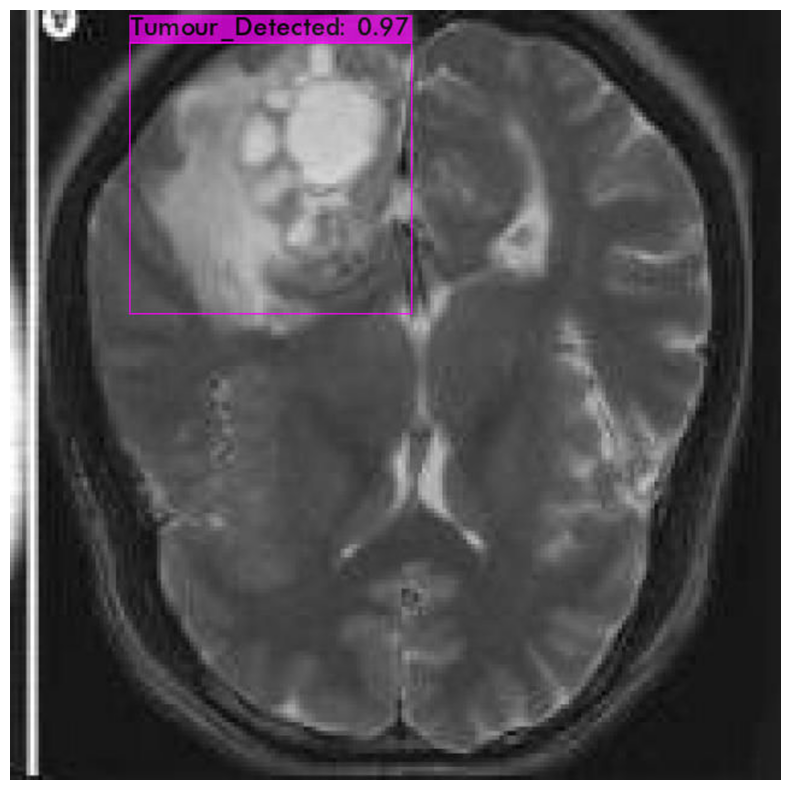

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/darknet/yolov4-obj_best.weights /content/darknet/data/test/y718_jpg.rf.9ed398fe7e633fe5635be729b0a14055.jpg -thresh 0.7
imShow('predictions.jpg')

# Thanks!